In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import mglearn

### 2.3.1 예제에 사용할 데이터셋

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape: (26, 2)


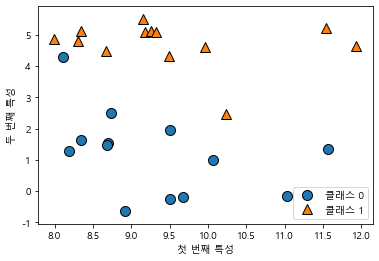

In [2]:
# forge 데이터셋 생성
X, y = mglearn.datasets.make_forge()

# 마이너스 부호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 산점도 작성
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)

Text(0, 0.5, '타겟')

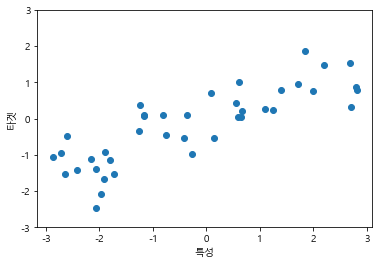

In [3]:
# wave 데이터셋 생성
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타겟")

In [4]:
# 유방암 데이터셋 불러오기
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
# 유방암 데이터셋의 형태
print("유방암 데이터셋의 형태:" ,cancer.data.shape)

유방암 데이터셋의 형태: (569, 30)


In [6]:
# 클래스별 샘플 개수 확인
print("클래스별 샘플 개수:\n", {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [7]:
# 특성 의미 확인
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


---

<br>
<br>
<br>

---
### 2.3.2 k-최근접 이웃

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


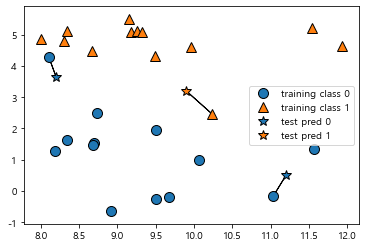

In [8]:
# 가장 간단한 k-NN으로 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용
# forge 데이터셋을 1-NN 으로 분류
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


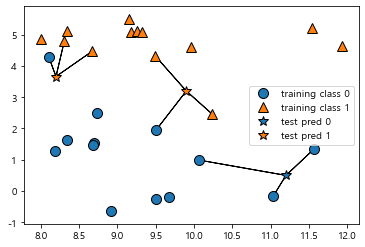

In [9]:
# forge 데이터셋을 3-NN 으로 분류
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
# KNeighborsClassifier 임포트 후 객체 생성하고 이웃 수 매개변수 지정
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
# 훈련 세트로 모델 학습
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# 테스트 데이터에 대해 predict 메서드 호출로 예측
print("테스트 세트 예측:", clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [14]:
# 모델 평가
print("테스트 세트 정확도: {:.2f}" .format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


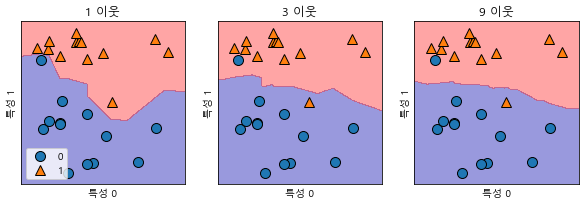

In [15]:
# xy 평면에 그려서 결정경계(decision boundary) 분석
fig, axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)  

# 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아짐

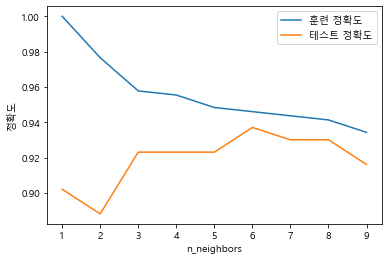

In [16]:
# 유방암 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# 1에서 10까지 n_neightbors 적용
neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

# 이웃 수에 따른 훈련 세트와 데스트 세트 정확도 비교   
# 정확도가 가장 좋을 때는 중간 정도의 6개

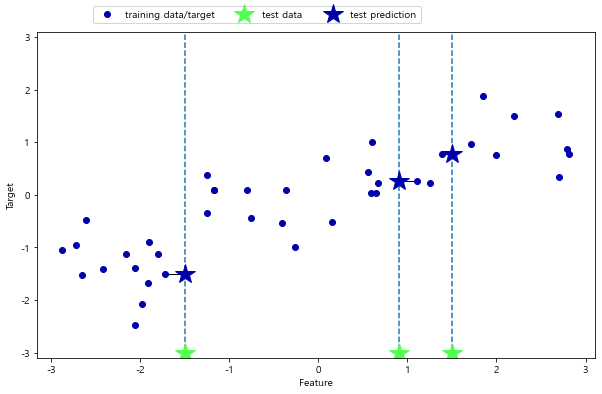

In [17]:
# wave 데이터셋 1-NN 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=1)

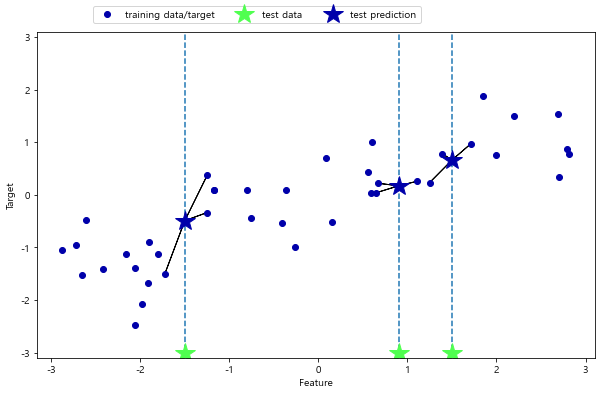

In [18]:
 # wave 데이터셋 3-NN 회귀 모델 예측
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [19]:
# 회귀를 위한 k-NN 알고리즘
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print("테스트 세트 예측:\n", reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
# 결정계수 R^2 값 확인
print("테스트 세트 R^2: {:.2f}" .format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


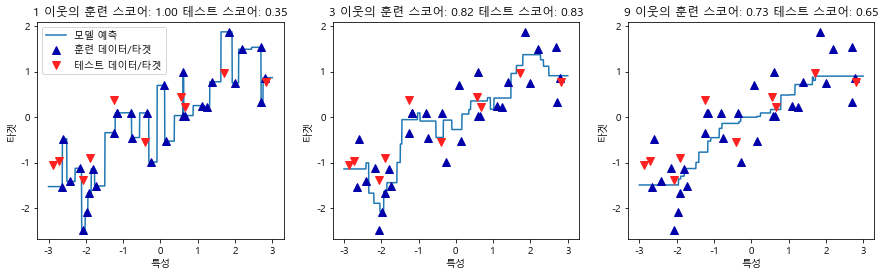

In [22]:
# KNeighborsRegressor 분석
fig, axes = plt.subplots(1,3, figsize=(15,4))

line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}" .format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타겟")
axes[0].legend(["모델 예측", "훈련 데이터/타겟", "테스트 데이터/타겟"], loc="best")  

In [23]:
'''
1이웃일 떄는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나가서 불안정한 예측을 만들어 냄   
이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정적인 예측을 얻을 수 있음

k-NN에서 중요한 매개변수는 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수   
실제로 이웃의 수는 3,5개 정도로 적을 때 잘 작동하지만 잘 조정해야 한다.   
   
k-NN의 장점은 이해하기 쉬운 모델이고 많이 조정하지 않아도 괜찮은 성능으로 더 복잡한 알고리즘 적용전에 시도해볼만한 시작점이다.   
모델은 빠르게 만들 수 있지만 훈련세트가 너무 크면 예측이 느려진다.   
k-NN 알고리즘을 사용할 땐 데이터 전처리 과정이 중요하다.   
수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않고 특성 값 데부분이 0인 데이터셋과는 특히 잘 작동하지 않는다.   
'''

'\n1이웃일 떄는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나가서 불안정한 예측을 만들어 냄   \n이웃을 많이 사용하면 훈련 데이터에는 잘 안맞을 수 있지만 더 안정적인 예측을 얻을 수 있음\n\nk-NN에서 중요한 매개변수는 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수   \n실제로 이웃의 수는 3,5개 정도로 적을 때 잘 작동하지만 잘 조정해야 한다.   \n   \nk-NN의 장점은 이해하기 쉬운 모델이고 많이 조정하지 않아도 괜찮은 성능으로 더 복잡한 알고리즘 적용전에 시도해볼만한 시작점이다.   \n모델은 빠르게 만들 수 있지만 훈련세트가 너무 크면 예측이 느려진다.   \nk-NN 알고리즘을 사용할 땐 데이터 전처리 과정이 중요하다.   \n수백 개 이상의 많은 특성을 가진 데이터셋에는 잘 작동하지 않고 특성 값 데부분이 0인 데이터셋과는 특히 잘 작동하지 않는다.   \n'

---

<br>
<br>
<br>

---
### 2.3.3 선형 모델

w[0]: 0.393906  b: -0.031804


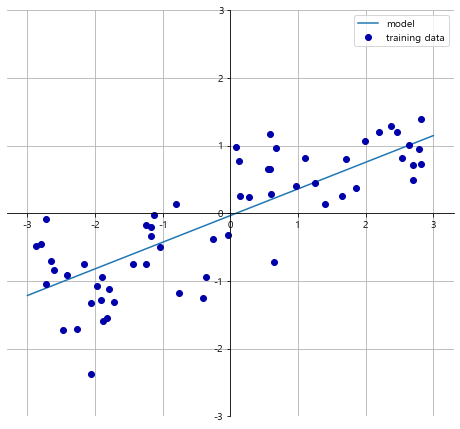

In [24]:
mglearn.plots.plot_linear_regression_wave()

##### 선형 회귀 (최소제곱법)

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [26]:
# 기울기 파라미터(w)는 가중치 또는 계수라고 하며 lr.coef_
# 편향, 절편 파라미터(b)는 lr.intercept_
print("lr.coef_", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_ [0.39390555]
lr.intercept_: -0.031804343026759746


In [27]:
print("훈련 세트 점수: {:.2f}" .format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lr.score(X_test, y_test)))
# 훈련세트, 테스트세트의 점수가 비슷함 -> 과소적합

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [28]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [29]:
print("훈련 세트 점수: {:.2f}" .format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lr.score(X_test, y_test)))
# 훈련 데이터와 테스트 데이터 사이의 큰 성능 차이 -> 모델이 과대적합되어 있으므로 복잡도를 제어할 수 있는 모델 필요

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


---
##### Ridge

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(ridge.score(X_test, y_test)))
# 기본 alpha = 1.0, alpha 값을 높이면 계수를 0에 더 가깝게 만들어서 훈련 세트의 성능은 나빠지지만 일반화에는 도움이 된다

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [31]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [32]:
# alpha = 0.1, 극도로 작은 alpha 값은 계수를 거의 제한하지 않음
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


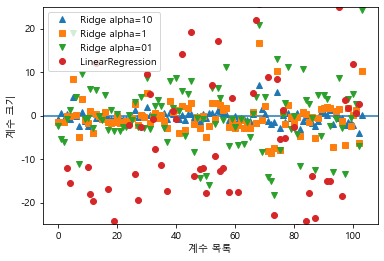

In [33]:
plt.plot(ridge10.coef_,'^', label="Ridge alpha=10")
plt.plot(ridge.coef_,'s', label="Ridge alpha=1")
plt.plot(ridge01.coef_,'v', label="Ridge alpha=01")

plt.plot(lr.coef_,'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

# alpha가 작아질수록 선형 회귀의 계수는 값이 커져 그림 밖으로 넘어간다

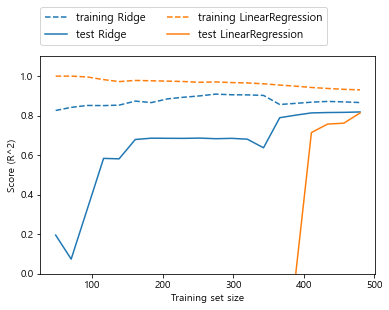

In [34]:
mglearn.plots.plot_ridge_n_samples()

In [35]:
'''
릿지, 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다.
리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터보다 낮지만 테스트 데이터에서는 리지의 점수가 더 높다.
데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지와 선형 회귀의 성능이 같아진다.
선형 회귀의 훈련 데이터 성능이 데이터가 많아질수록 감소하는데, 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.
'''

'\n릿지, 선형 회귀 모두 훈련 세트의 점수가 테스트 세트의 점수보다 높다.\n리지에는 규제가 적용되므로 리지의 훈련 데이터 점수가 전체적으로 선형 회귀의 훈련 데이터보다 낮지만 테스트 데이터에서는 리지의 점수가 더 높다.\n데이터를 충분히 주면 규제 항은 덜 중요해져서 릿지와 선형 회귀의 성능이 같아진다.\n선형 회귀의 훈련 데이터 성능이 데이터가 많아질수록 감소하는데, 데이터가 많아질수록 모델이 데이터를 기억하거나 과대적합하기 어려워지기 때문이다.\n'

---
##### Lasso

In [36]:
'''
라쏘는 L1규제로 일부 계수를 0으로 만든다. 즉 모델에서 완전히 제외되는 특성이 생긴다.
모델을 이해하기 쉬워지고 가장 중요한 특성이 무엇인지 드러내준다.
'''

'\n라쏘는 L1규제로 일부 계수를 0으로 만든다. 즉 모델에서 완전히 제외되는 특성이 생긴다.\n모델을 이해하기 쉬워지고 가장 중요한 특성이 무엇인지 드러내준다.\n'

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

#  104개의 특성 중 4개만 사용해서 훈련, 테스트 세트 모두 결과가 나쁘다.

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [38]:
# 과소적합을 줄이기 위해 alpha값을 줄여서 모델 작성
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

# alpha 값을 낮춰서 모델의 복잡도를 증가시켜 성능이 좋아졌다.
# 성능도 릿지보다 조금 좋은데 사용된 특성도 33개로 모델을 분석하기도 조금 더 쉽다.

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [39]:
# alpha값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되어 선형회귀와 결과가 비슷해진다.
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}" .format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}" .format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


(-25.0, 25.0)

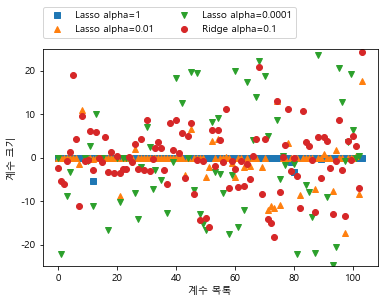

In [40]:
plt.plot(lasso.coef_,'s', label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.xlim(xlims)
plt.ylim(-25,25)


In [41]:
'''
alpha=1일 때 대부분의 변수가 0이고 나머지 계수들도 크기가 작다.
alpha=0.01일 때도 많은 변수가 0이고 alpha=0.001일 때 계수 대부분이 0이 아니다.
라쏘와 릿지를 결합한 Elastic Net도 있다.
'''

'\nalpha=1일 때 대부분의 변수가 0이고 나머지 계수들도 크기가 작다.\nalpha=0.01일 때도 많은 변수가 0이고 alpha=0.001일 때 계수 대부분이 0이 아니다.\n라쏘와 릿지를 결합한 Elastic Net도 있다.\n'

---
##### 분류용 선형 모델

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


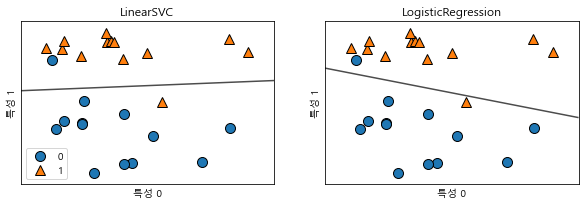

In [42]:
# Logistic Regression, Linear SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False,eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

In [43]:
'''
규제의 강도를 결정하는 매개변수는 C
C의 값이 높아지면 규제가 감소한다. -> 높은 C값을 설정하면 훈련세트에 가능한 최대로 맞추려 하고 C값을 낮추면 계수 벡터(w)가 0에 가까워지게 한다.
C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하고, C의 값이 높아지면 개개의 데이터 포인트를 정확히 분류하려고 한다.
'''

'\n규제의 강도를 결정하는 매개변수는 C\nC의 값이 높아지면 규제가 감소한다. -> 높은 C값을 설정하면 훈련세트에 가능한 최대로 맞추려 하고 C값을 낮추면 계수 벡터(w)가 0에 가까워지게 한다.\nC의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하고, C의 값이 높아지면 개개의 데이터 포인트를 정확히 분류하려고 한다.\n'

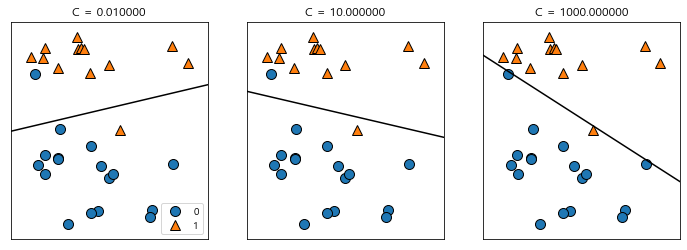

In [44]:
mglearn.plots.plot_linear_svc_regularization()

In [45]:
# 유방암 데이터셋으로 Logisitic Regression 분석
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train) 
print("훈련 세트 점수: {:.3f}" .format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}" .format(logreg.score(X_test, y_test)))

# 훈련 세트와 테스트 세트가 매우 비슷해서 과소적합 의심

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [46]:
# 모델의 제약을 더 풀어주기 위해 C 값 증가
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train) 
print("훈련 세트 점수: {:.3f}" .format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}" .format(logreg100.score(X_test, y_test)))

# C 값을 증가시키니 훈련세트, 테스트세트의 정확도 둘다 조금 증가한다.

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [47]:
# C값을 작게해서 규제
logreg001 = LogisticRegression(C=0.01, max_iter=3000).fit(X_train, y_train) 
print("훈련 세트 점수: {:.3f}" .format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}" .format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


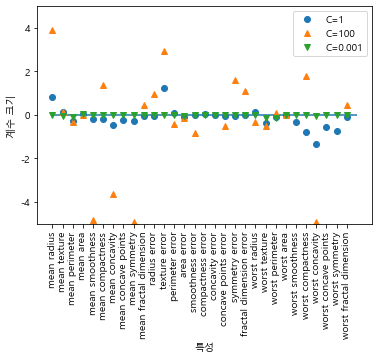

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000인 l1 로지스틱 회귀의 테스트 정확도: 0.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


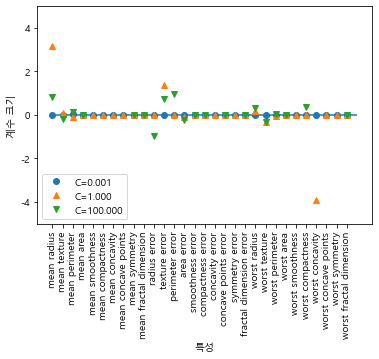

In [49]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train)
    print("C={:.3f}인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f}인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

---
##### 다중 클래스 분류용 선형 모델

In [50]:
'''
이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 방법이다.
일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시키고 결국 클래스의 수만큼 이진 분류 모델이 만들어진다.
예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.
'''

'\n이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 일대다 방법이다.\n일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시키고 결국 클래스의 수만큼 이진 분류 모델이 만들어진다.\n예측을 할 때 이렇게 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.\n'

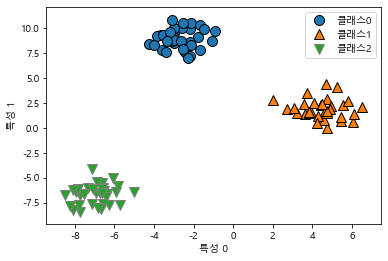

In [51]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스0", "클래스1", "클래스2"])


In [52]:
# 이 데이터셋으로 LinearSVC 분류기를 훈련
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)


계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


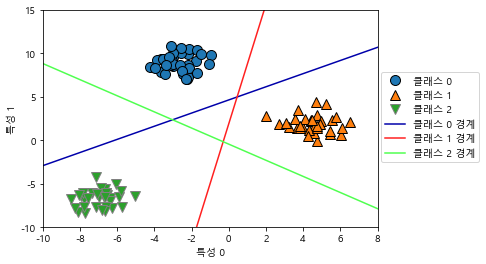

In [53]:
# 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01,0.3))


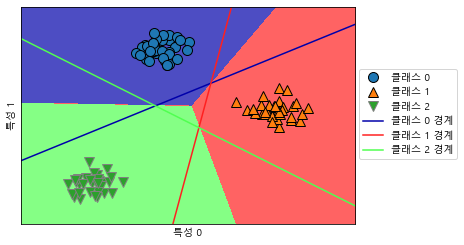

In [54]:
# 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'], loc=(1.01,0.3))


---
##### 장단점과 매개변수

In [55]:
'''
선형 모델의 주요 매개변수는 회귀모델에서는 alpha, 분류 모델에서는 C
alpha 값이 클수록, C 값이 작을수록 모델이 단순해진다. 이 매개변수를 조정하느 것이 중요하다.
보통 C와 alpha는 로그스케일(0.01, 0.1, 1, 10.. 10배씩)로 최적치를 정하고 L1 규제를 사용할지 L2 규제를 사용할지 정한다.
모델의 해석이 중요하거나 중요한 특성이 많지 않다고 생각되면 L1 규제, 그렇지 않다면 기본적으로 L2 규제를 사용한다.

선형 모델은 학습 속도가 빠르고 예측도 빠르다. 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본설정보다 빠르게 처리하도록
LogisticRegression과 Ridge에 solver='sag' 옵션을 해준다. (확률적 경사 하강법) 또는 SGDClassifier와 SGDRegressor도 사용할 수 있다.

선형 모델의 다른 장범은 회귀와 분류의 공식을 통해 예측이 어떻게 만들어지는 비교적 쉽게 이해할 수 있다.
하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있는데 데이터셋의 특성들이 서로 깊에 연관되어 있을 때 그렇다.

선형 모델은 샘플에 비해 특성이 많을 때 잘 작동한다. 하지만 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다.

'''

"\n선형 모델의 주요 매개변수는 회귀모델에서는 alpha, 분류 모델에서는 C\nalpha 값이 클수록, C 값이 작을수록 모델이 단순해진다. 이 매개변수를 조정하느 것이 중요하다.\n보통 C와 alpha는 로그스케일(0.01, 0.1, 1, 10.. 10배씩)로 최적치를 정하고 L1 규제를 사용할지 L2 규제를 사용할지 정한다.\n모델의 해석이 중요하거나 중요한 특성이 많지 않다고 생각되면 L1 규제, 그렇지 않다면 기본적으로 L2 규제를 사용한다.\n\n선형 모델은 학습 속도가 빠르고 예측도 빠르다. 수십만에서 수백만 개의 샘플로 이뤄진 대용량 데이터셋이라면 기본설정보다 빠르게 처리하도록\nLogisticRegression과 Ridge에 solver='sag' 옵션을 해준다. (확률적 경사 하강법) 또는 SGDClassifier와 SGDRegressor도 사용할 수 있다.\n\n선형 모델의 다른 장범은 회귀와 분류의 공식을 통해 예측이 어떻게 만들어지는 비교적 쉽게 이해할 수 있다.\n하지만 계수의 값들이 왜 그런지 명확하지 않을 때가 종종 있는데 데이터셋의 특성들이 서로 깊에 연관되어 있을 때 그렇다.\n\n선형 모델은 샘플에 비해 특성이 많을 때 잘 작동한다. 하지만 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋다.\n\n"

---

<br>
<br>
<br>

---
### 2.3.4 나이브 베이즈 분류기

In [56]:
'''
나이브 베이즈 분류기는 앞 절의 선형 모델과 매우 유사하다.
LogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련속도가 빠른 편이지만, 일반화 성능이 조금 떨어진다.

나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단수하게 취합하기 때문이다.
scikit-learn에서 구현된 나이브 베이즈 분류기는 GuassianNM(연속적인 어떤 데이터에도 적용 가능), BernoulliNB(이진 데이터에 적용), MultinomialNB(카운트 데이터에 적용) 세 가지이다.
BernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용한다.
'''

'\n나이브 베이즈 분류기는 앞 절의 선형 모델과 매우 유사하다.\nLogisticRegression이나 LinearSVC 같은 선형 분류기보다 훈련속도가 빠른 편이지만, 일반화 성능이 조금 떨어진다.\n\n나이브 베이즈 분류기가 효과적인 이유는 각 특성을 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단수하게 취합하기 때문이다.\nscikit-learn에서 구현된 나이브 베이즈 분류기는 GuassianNM(연속적인 어떤 데이터에도 적용 가능), BernoulliNB(이진 데이터에 적용), MultinomialNB(카운트 데이터에 적용) 세 가지이다.\nBernoulliNB, MultinomialNB는 대부분 텍스트 데이터를 분류할 때 사용한다.\n'

In [57]:
# BernoulliNB 분류기는 각 클래스의 특성 중 0이 아닌 것의 몇 개인지 센다.
X = np.array([[0,1,0,1],
            [1,0,1,1],
            [0,0,0,0],
            [1,0,1,0]])
y = np.array([0,1,0,1])

In [58]:
counts={}
for label in np.unique(y):
    # 각 클래스에 대해 반복
    # 특성마다 1이 나타난 횟수를 센다.
    counts[label] = X[y == label]. sum(axis=0)
print("특성 카운트:\n", counts)

특성 카운트:
 {0: array([0, 1, 0, 1]), 1: array([2, 0, 2, 1])}


In [59]:
'''
다른 두 나이브 베이즈 모델은 계산하는 통계 데이터의 종류가 조금 다른데 MultinomialNB는 클래스별로 특성의 평균을 계산하고 GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장한다.
예측할 땐 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 한다.
'''

'\n다른 두 나이브 베이즈 모델은 계산하는 통계 데이터의 종류가 조금 다른데 MultinomialNB는 클래스별로 특성의 평균을 계산하고 GaussianNB는 클래스별로 각 특성의 표준편차와 평균을 저장한다.\n예측할 땐 데이터 포인트를 클래스의 통계 값과 비교해서 가장 잘 맞는 클래스를 예측값으로 한다.\n'

##### 장단점과 매개변수

In [60]:
'''
MultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있다. alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가하고
이는 통계 데이터를 완만하게 만들어준다. alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다. alpha에 따른 알고리즘 성능 변동은 비교적 크지 않지만 어느 정도는 정확도를 높일 수 있다.

GaussianNB는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용한다.
나이브 베이즈 모델과 선형 모델의 장단점은 비슷하다. 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽다. 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않다.
선형 모댈로는 학습시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하다.

'''

'\nMultinomialNB와 BernoulliNB는 모델의 복잡도를 조절하는 alpha 매개변수 하나를 가지고 있다. alpha가 주어지면 알고리즘이 모든 특성에 양의 값을 가진 가상의 데이터 포인트를 alpha 개수만큼 추가하고\n이는 통계 데이터를 완만하게 만들어준다. alpha가 크면 더 완만해지고 모델의 복잡도는 낮아진다. alpha에 따른 알고리즘 성능 변동은 비교적 크지 않지만 어느 정도는 정확도를 높일 수 있다.\n\nGaussianNB는 대부분 매우 고차원인 데이터셋에 사용하고, 다른 두 나이브 베이즈 모델은 텍스트 같은 희소한 데이터를 카운트하는 데 사용한다.\n나이브 베이즈 모델과 선형 모델의 장단점은 비슷하다. 훈련과 예측 속도가 빠르며 훈련 과정을 이해하기 쉽다. 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않다.\n선형 모댈로는 학습시간이 너무 오래 걸리는 매우 큰 데이터셋에는 나이브 베이즈 모델을 시도해볼 만하다.\n\n'

---

<br>
<br>
<br>

---
### 2.3.5 결정 트리

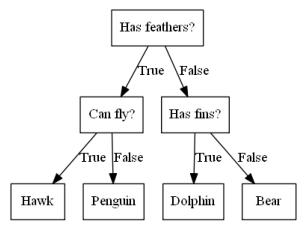

In [61]:
mglearn.plots.plot_animal_tree()

##### 결정 트리의 복잡도 제어하기

In [62]:
# 기본 값 설정으로 완전한 트리 모델 생성
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}" .format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}" .format(tree.score(X_test, y_test)))

# 모든 리프 노드가 순수 노드이므로 훈련세트의 정확도는 100%
# 가지치기를 하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지 않는다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [63]:
# 일정 깊이에 도달하면 트리의 성장 제한해서 훈련세트의 정확도를 떨어뜨리지만 테스트세트의 성능은 개선됨
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}" .format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}" .format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


---
##### 결정 트리 분석

In [64]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, impurity=False, filled=True)

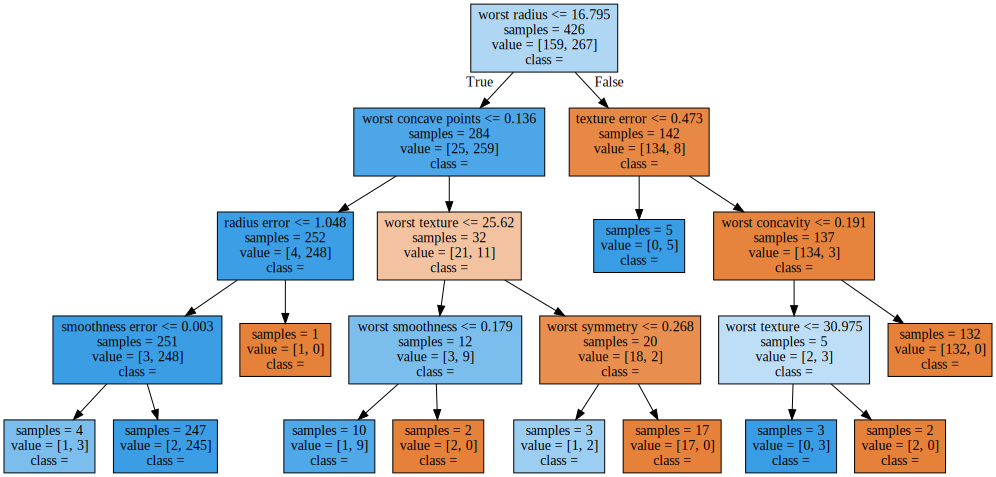

In [65]:
import graphviz

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

# 트리를 시각화하면 알고리즘의 예측이 어떻게 이뤄지는지 잘 이해할 수 있다.

---
##### 트리의 특성 중요도

In [66]:
'''
전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요약하는 속성을 사용할 수 있다.
가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도(feature importance)이다.
이 값은 0과 1사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻이다. 특성 중요도의 전체 합은 1이다.
'''

'\n전체 트리를 살펴보는 것은 어려울 수 있으니, 대신 트리가 어떻게 작동하는지 요약하는 속성을 사용할 수 있다.\n가장 널리 사용되는 속성은 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도(feature importance)이다.\n이 값은 0과 1사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않았다는 뜻이고 1은 완벽하게 타깃 클래스를 예측했다는 뜻이다. 특성 중요도의 전체 합은 1이다.\n'

In [67]:
print("특성 중요도:\n", tree.feature_importances_)

# 첫 번째 노드에서 사용한 특성 worst radius가 가장 중요한 특성으로 나타난다.
# 어떤 특성의 특성 중요도값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아니다.


특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


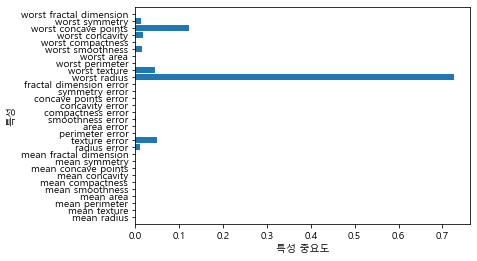

In [68]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

# 선형 계수와 달리 특성중요도는 항상 양수이며 특성이 어떤 클래스를 지지하는지 알 수 없다. 이 데이터에선 worst radius가 중요하지만 양성인지 악성인지 알 수 없다.

Feature importances: [0. 1.]


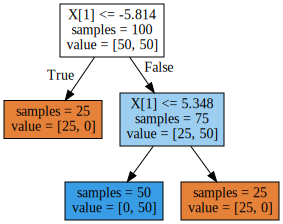

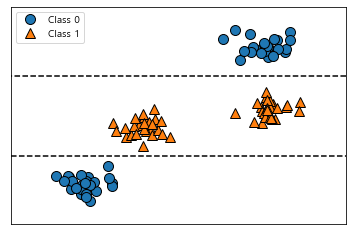

In [69]:
# 특성과 클래스 사이에는 간단하지 않은 관계가 있을 수 있다.
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 아래 그림은 X[1]의 정보만 사용되었는데 X[1]값이 높으면 클래스 0이고 낮으면 1이라고 말할 수 없다.

Text(0.5, 0, '가격 ($/Mbyte)')

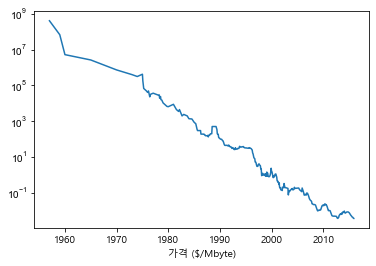

In [70]:
# 회귀 결정 트리에서도 비슷하게 적용되지만 훈련데이터 범위 밖의 포인트는 예측할 수 없다. (외삽, extrapolation)
# 컴퓨터 메모리 가격 동향 데이터셋
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.xlabel("가격 ($/Mbyte)")

# y축은 로그 스케일인데 로그 스케일로 그리면 약간의 굴곡을 제외하고는 선형적으로 나타나서 비교적 예측하기 쉬워진다.

In [71]:
# 날짜 특성하나만으로 2000년 전까지의 데이터로부터 2000년 후의 가격을 예측

from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date < 2000] 
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = np.array(data_train['date']).reshape(-1,1)
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일로 바꿔줌
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = np.array(ram_prices['date']).reshape(-1,1)

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌린다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


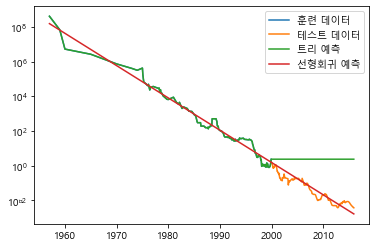

In [72]:
# 램 가격 데이터를 사용해 만든 선형 모델과 회귀 트리의 예측값 비교
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

# 두 모델은 확연한 차이를 보이는데 선형 모델은 직선으로 데이터를 근사한다.
# 트리의 복잡도에 제한을 주지 않아서 트리 모델은 훈련 데이터를 완벽하게 예측한다. 하지만 모델이 가진 데이터 범위 밖으로 나가면 단순히 마지막 포인트를 이용해서 예측하여 
# 데이터 밖의 새로운 데이터를 예측할 능력이 없다.

---
##### 장단점과 매개변수

In [73]:
'''
결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수이다.
보통은 사전 가지치기 방법중 max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는데 충분하다.

결정 트리가 앞에 다른 알고리즘들보다 나은 점은 두가지로 첫째, 만들어진 모델을 쉽게 시각화할 수 있어 비전문가도 이해하기 쉽고 데이터의 스케일에 구애받지 않는다.
각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요없다.

결정 트리의 주요 단점은 사전 가지치기를 해도 과대적합되는 경향이 있어 일반화 성능이 좋지 않다. 그래서 다음에 설명할 앙상블 방법을 대안으로 흔히 사용한다.
'''

'\n결정 트리에서 모델 복잡도를 조절하는 매개변수는 트리가 완전히 만들어지기 전에 멈추게 하는 사전 가지치기 매개변수이다.\n보통은 사전 가지치기 방법중 max_depth, max_leaf_nodes, min_samples_leaf 중 하나만 지정해도 과대적합을 막는데 충분하다.\n\n결정 트리가 앞에 다른 알고리즘들보다 나은 점은 두가지로 첫째, 만들어진 모델을 쉽게 시각화할 수 있어 비전문가도 이해하기 쉽고 데이터의 스케일에 구애받지 않는다.\n각 특성이 개별적으로 처리되어 데이터를 분할하는데 데이터 스케일의 영향을 받지 않으므로 결정 트리에서는 특성의 정규화나 표준화 같은 전처리 과정이 필요없다.\n\n결정 트리의 주요 단점은 사전 가지치기를 해도 과대적합되는 경향이 있어 일반화 성능이 좋지 않다. 그래서 다음에 설명할 앙상블 방법을 대안으로 흔히 사용한다.\n'

---

<br>
<br>
<br>

---
### 2.3.6 결정 트리의 앙상블

##### 랜덤 포레스트

In [74]:
'''
랜덤포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다.
잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들고 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.
이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어든다. 
'''

'\n랜덤포레스트는 기본적으로 조금씩 다른 여러 결정 트리의 묶음이다.\n잘 작동하되 서로 다른 방향으로 과대적합된 트리를 많이 만들고 그 결과를 평균냄으로써 과대적합된 양을 줄일 수 있다.\n이렇게 하면 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어든다. \n'

---
##### 랜덤포레스트 구축

In [75]:
'''
랜덤 포레스트 모델을 만드려면 생성할 트리의 개수를 정해야 한다.
10개가 필요하다고 가정하고 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 한다.
트리를 만들기 위해 먼저 부트스트랩 샘플을 생성하고 이 데이터셋으로 결정 트리를 만든다.
그런데 앞에서의 결정 트리 알고리즘과 조금 다른데 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다.
몇 개의 특성을 고를지는 max_features 매개변수로 조정할 수 있다. 후보 특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 다른 후보 특성들을 사용하여 테스트를 만든다.
조금씩 다른 데이터셋을 사용하고 트리의 각 분기는 다른 특성 부분 집합을 사용하므로 랜덤 포레스트의 모든 트리는 서로 달라지게 된다.

이 방식에서 핵심 매개변수는 max_features 인데 이를 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다.
반대로 1로 설정하면 테스트할 특성을 고르지 않고 그냥 무작위로 선택한 한 특성의 임계값을 찾기만 한다.
즉 max_features 값을 크게하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰지고, 작게하면 많이 달리지고 각 트리를 데이터에 맞추기 위해 깊이가 깊어진다.
'''

'\n랜덤 포레스트 모델을 만드려면 생성할 트리의 개수를 정해야 한다.\n10개가 필요하다고 가정하고 이 트리들은 완전히 독립적으로 만들어져야 하므로 알고리즘은 각 트리가 고유하게 만들어지도록 무작위한 선택을 한다.\n트리를 만들기 위해 먼저 부트스트랩 샘플을 생성하고 이 데이터셋으로 결정 트리를 만든다.\n그런데 앞에서의 결정 트리 알고리즘과 조금 다른데 각 노드에서 전체 특성을 대상으로 최선의 테스트를 찾는 것이 아니고 알고리즘이 각 노드에서 후보 특성을 무작위로 선택한 후 이 후보들 중에서 최선의 테스트를 찾는다.\n몇 개의 특성을 고를지는 max_features 매개변수로 조정할 수 있다. 후보 특성을 고르는 것은 매 노드마다 반복되므로 트리의 각 노드는 다른 후보 특성들을 사용하여 테스트를 만든다.\n조금씩 다른 데이터셋을 사용하고 트리의 각 분기는 다른 특성 부분 집합을 사용하므로 랜덤 포레스트의 모든 트리는 서로 달라지게 된다.\n\n이 방식에서 핵심 매개변수는 max_features 인데 이를 n_features로 설정하면 트리의 각 분기에서 모든 특성을 고려하므로 특성 선택에 무작위성이 들어가지 않는다.\n반대로 1로 설정하면 테스트할 특성을 고르지 않고 그냥 무작위로 선택한 한 특성의 임계값을 찾기만 한다.\n즉 max_features 값을 크게하면 랜덤 포레스트의 트리들은 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰지고, 작게하면 많이 달리지고 각 트리를 데이터에 맞추기 위해 깊이가 깊어진다.\n'

---
##### 랜덤 포레스트 분석

In [76]:
# two_moon 데이터셋으로 트리 5개로 구성된 랜덤포레스트 모델 생성
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# 랜덤포레스트 안에 만들어진 트리는 estimators_ 속성에 저장된다.

RandomForestClassifier(n_estimators=5, random_state=2)

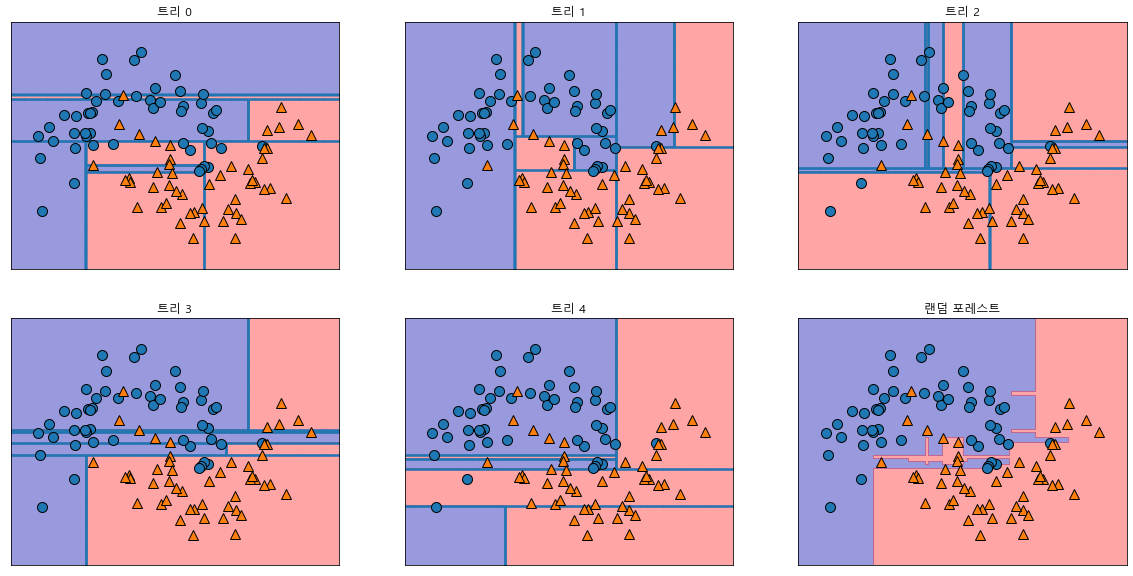

In [77]:
# 각 트리에서 학습된 결정 경계와 이를 취합한 결정 경계 시각화
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}" .format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# 5개의 트리가 만든 결정 경계는 확연히 다르지만 랜덤포레스트는 개개의 트리보다 훨씬 덜 과대적합되고 좋은 결정 경계를 만들어준다.

In [78]:
# 유방암 데이터셋에 100개의 트리로 이뤄진 랜덤포레스트 적용
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}" .format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}" .format(forest.score(X_test, y_test)))

# 랜덤포레스트는 아무런 매개변수 튜닝 없이도 선형 모델이나 단일 결정 트리보다 높은 97% 정확도를 내고 있다.
# 앞에 단일 결정 트리 처럼 가지치기로 매개변수를 조정할 수 있지만 기본 설정으로도 좋은 결과를 만들어줄 때가 많다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


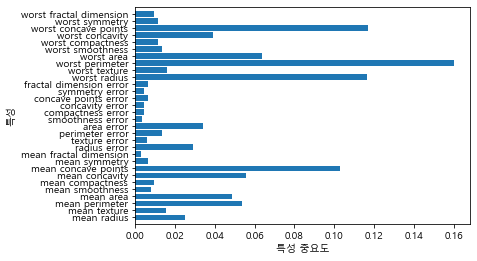

In [79]:
# 일반적으로 랜덤포레스트에서 제공하는 특성 중요도는 하나의 트레에서 제공하는 것보다 신뢰할 만하다.
plot_feature_importances_cancer(forest)

---
##### 장단점과 매개변수

In [80]:
'''
회귀와 분류에 있어서 랜덤포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.
성능이 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터 스케일을 맞출 필요도 없다.
기본적으로 랜덤포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있다.
하지만 만약 의사결정 과정을 간소하게 표현해야 한다면 단일 트리를 사용할 수도 있다.
대량의 데이터셋에서 랜덤포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU 코어가 많다면 병렬 처리가 가능하다.
멀티 코어 프로세서일 때는 n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할 수 있다.
n_job=-1로 지정하면 모든 코어를 사용하며 기본값은 1이다.
유념할 점은 랜덤 포레스트는 이름 그대로 랜덤하므로 random_state를 지정하지 않으면 전혀 다른 모델이 만들어진다.

랜덤포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터에는 선형 모델이 더 적합하다.

중요 매개변수는 n_estimators, max_features이고 max_depth 같은 사전 가지치기 옵션이 있다. n_estimators는 클수록 좋다.
더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만든다.
하지만 더 많은 트리는 더 많은 메모리와 큰 훈련 시간으로 이어진다. 가용한 시간과 메모리만큼 만드는 것이 좋다.
'''

'\n회귀와 분류에 있어서 랜덤포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.\n성능이 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터 스케일을 맞출 필요도 없다.\n기본적으로 랜덤포레스트는 단일 트리의 단점을 보완하고 장점은 그대로 가지고 있다.\n하지만 만약 의사결정 과정을 간소하게 표현해야 한다면 단일 트리를 사용할 수도 있다.\n대량의 데이터셋에서 랜덤포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU 코어가 많다면 병렬 처리가 가능하다.\n멀티 코어 프로세서일 때는 n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할 수 있다.\nn_job=-1로 지정하면 모든 코어를 사용하며 기본값은 1이다.\n유념할 점은 랜덤 포레스트는 이름 그대로 랜덤하므로 random_state를 지정하지 않으면 전혀 다른 모델이 만들어진다.\n\n랜덤포레스트는 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 작동하지 않는다. 이런 데이터에는 선형 모델이 더 적합하다.\n\n중요 매개변수는 n_estimators, max_features이고 max_depth 같은 사전 가지치기 옵션이 있다. n_estimators는 클수록 좋다.\n더 많은 트리를 평균하면 과대적합을 줄여 더 안정적인 모델을 만든다.\n하지만 더 많은 트리는 더 많은 메모리와 큰 훈련 시간으로 이어진다. 가용한 시간과 메모리만큼 만드는 것이 좋다.\n'

---
##### 그래디언트 부스팅 회귀

In [81]:
'''
그래디언트 부스팅 회귀는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법이다.
이름은 회귀지만 회귀, 분류 모두에 사용할 수 있다.
랜덤포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없다.
대신 강력한 사전 가지치기가 사용된다.
그래디언트 부스팅 트리는 보통 1~5 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다.
그래디언트 부스팅의 근본 아이디어는 이런 얕은 트리 같은 간단한 모델(약한 학습기)을 많이 연결하는 것.
각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될 수록 성능이 좋아진다.

랜덤 포레스트보다 매개변수 설정에 조금 더 민감하짐나 잘 조정하면 더 높은 정확도를 제공해준다.

앙상블 방식에 있는 사전 가지치기나 트리 개수 외에도 그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate이다.
학습률이 크면 트리는 보정을 강하게 해서 복잡한 모델을 만든다.
n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아진다.


'''

'\n그래디언트 부스팅 회귀는 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 또 다른 앙상블 방법이다.\n이름은 회귀지만 회귀, 분류 모두에 사용할 수 있다.\n랜덤포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.\n기본적으로 그래디언트 부스팅 회귀 트리에는 무작위성이 없다.\n대신 강력한 사전 가지치기가 사용된다.\n그래디언트 부스팅 트리는 보통 1~5 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠르다.\n그래디언트 부스팅의 근본 아이디어는 이런 얕은 트리 같은 간단한 모델(약한 학습기)을 많이 연결하는 것.\n각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가될 수록 성능이 좋아진다.\n\n랜덤 포레스트보다 매개변수 설정에 조금 더 민감하짐나 잘 조정하면 더 높은 정확도를 제공해준다.\n\n앙상블 방식에 있는 사전 가지치기나 트리 개수 외에도 그래디언트 부스팅에서 중요한 매개변수는 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어하는 learning_rate이다.\n학습률이 크면 트리는 보정을 강하게 해서 복잡한 모델을 만든다.\nn_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아진다.\n\n\n'

In [82]:
# 유방암 데이터셋을 이용해 GradientBoostingClassifier 적용, 기본값 깊이 3인 트리 100개와 학습률 0.1
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}" .format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}" .format(gbrt.score(X_test,y_test)))

# 훈련 세트의 정확도가 100%로 과대적합 의심, 과대적합을 막기 위해서 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


In [83]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}" .format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}" .format(gbrt.score(X_test,y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [84]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}" .format(gbrt.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}" .format(gbrt.score(X_test,y_test)))

# 위 두 방식은 모델의 복잡도를 감소시켜 예상대로 훈련 세트의 정확도가 낮아졌다. 학습률을 낮추는 것은 테스트 세트의 성능에 조금밖에 개선하지 못했지만 트리의 깊이를 낮추는 것은 모델 성능 향상에 크게 기여했다.

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


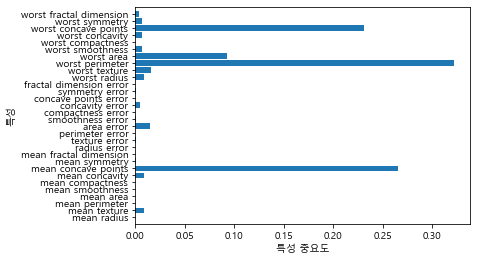

In [85]:
# 다른 결정 트리 기반의 모델처럼 특성의 중요도를 시각화
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

In [86]:
'''
그래디언트 부스팅 트리의 중요도 그래프가 랜덤포레스트와 비슷한 특성을 강조하고 있지만 그래디언트 부스팅은 일부 특성을 완전히 무시하고 있다.
비슷한 종류의 데이터에서 두 모델 둘다 잘 작동하지만 보통 더 안정적인 랜덤포레스트를 먼저 적용한다. 예측시간이 중요하거나 마지막 성능까지 쥐어짜야 할 때 그래디언트가 도움이 된다.

대규모 머신러닝 문제에 그래디언트 부스팅을 적용하려면 xgboost 패키지도 검토해보는 것이 좋다.
'''

'\n그래디언트 부스팅 트리의 중요도 그래프가 랜덤포레스트와 비슷한 특성을 강조하고 있지만 그래디언트 부스팅은 일부 특성을 완전히 무시하고 있다.\n비슷한 종류의 데이터에서 두 모델 둘다 잘 작동하지만 보통 더 안정적인 랜덤포레스트를 먼저 적용한다. 예측시간이 중요하거나 마지막 성능까지 쥐어짜야 할 때 그래디언트가 도움이 된다.\n\n대규모 머신러닝 문제에 그래디언트 부스팅을 적용하려면 xgboost 패키지도 검토해보는 것이 좋다.\n'

---
##### 장단점과 매개변수

In [87]:
'''
그래디언트 부스팅 결정 트리는 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 하나이다.
가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것이다.
다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 작동한다.
트리 기반 모델의 특성상 희소한 고차원의 데이터에는 잘 작동하지 않는다.

그래디언트 부스팅 트리 모델의 중요 매개변수는 트리의 개수를 지정하는 n_estimators와 이진 트리의 오차를 보정하는 정도를 조절하는 learning_rate이다.
이 두 매개변수는 매우 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 한다.
n_estimators가 클수록 좋은 랜덤포레스트와는 달리 그래디언트 부스팅에선 n_estimators를 크게하면 모델이 복잡해지고 과대적합될 가능성이 높아진다.
일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는다.

또 다른 중요한 다른 매개변수는 각 트리의 복잡도를 낮추는 max_depth, max_leaf_nodes이다.
통상 그래디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하여 트리의 깊이가 5보다 깊어지지 않게 한다.
'''

'\n그래디언트 부스팅 결정 트리는 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 하나이다.\n가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것이다.\n다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고 이진 특성이나 연속적인 특성에서도 잘 작동한다.\n트리 기반 모델의 특성상 희소한 고차원의 데이터에는 잘 작동하지 않는다.\n\n그래디언트 부스팅 트리 모델의 중요 매개변수는 트리의 개수를 지정하는 n_estimators와 이진 트리의 오차를 보정하는 정도를 조절하는 learning_rate이다.\n이 두 매개변수는 매우 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해 더 많은 트리를 추가해야 한다.\nn_estimators가 클수록 좋은 랜덤포레스트와는 달리 그래디언트 부스팅에선 n_estimators를 크게하면 모델이 복잡해지고 과대적합될 가능성이 높아진다.\n일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는다.\n\n또 다른 중요한 다른 매개변수는 각 트리의 복잡도를 낮추는 max_depth, max_leaf_nodes이다.\n통상 그래디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하여 트리의 깊이가 5보다 깊어지지 않게 한다.\n'

---

<br>
<br>
<br>

---
### 2.3.7 배깅, 엑스트라 트리, 에이다부스트

In [88]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state = 0)

---
##### 배깅

In [89]:
'''
배깅은 Bootstrap aggregating의 줄임말로 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킨다.
분류기가 predict_proba() 메서드를 지원하는 경우 확률값을 평균하여 예측을 수행한다.
그렇지 않은 분류기를 사용할 때는 가장 빈도가 높은 클래스 레이블이 예측 결과가 된다.
'''

'\n배깅은 Bootstrap aggregating의 줄임말로 중복을 허용한 랜덤 샘플링으로 만든 훈련 세트를 사용하여 분류기를 각기 다르게 학습시킨다.\n분류기가 predict_proba() 메서드를 지원하는 경우 확률값을 평균하여 예측을 수행한다.\n그렇지 않은 분류기를 사용할 때는 가장 빈도가 높은 클래스 레이블이 예측 결과가 된다.\n'

In [90]:
# 배깅을 사용하여 cancer 데이텃세에 로지스틱 회귀 모델을 100개 훈련하여 앙상블
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators = 100, oob_score = True, n_jobs = -1, random_state=42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [91]:
print("훈련 세트 정확도: {:.3f}" .format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}" .format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도: {:.3f}" .format(bagging.oob_score_))

훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.944
OOB 샘플의 정확도: 0.941


In [92]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 5, n_jobs = -1, random_state = 42)

bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

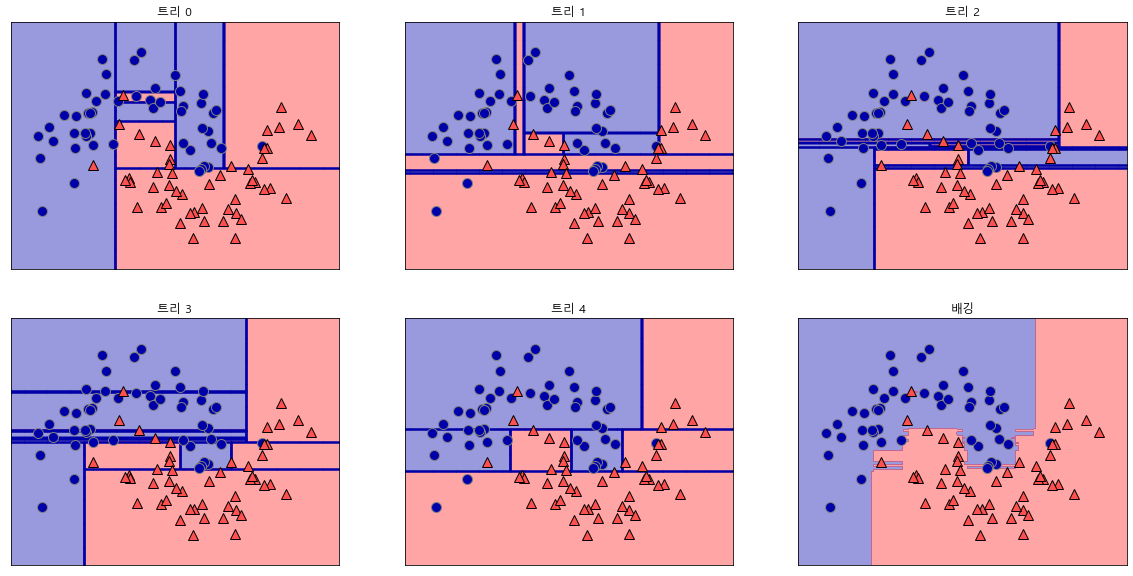

In [93]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [94]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(Xc_train, yc_train)

print("훈련 세트 정확도 : {:.3f}".format(bagging.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}".format(bagging.score(Xc_test, yc_test)))
print("OOB 샘플의 정확도 : {:.3f}".format(bagging.oob_score_))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.965
OOB 샘플의 정확도 : 0.948


---
##### 엑스트라 트리

In [95]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators =5, n_jobs = -1, random_state = 0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(n_estimators=5, n_jobs=-1, random_state=0)

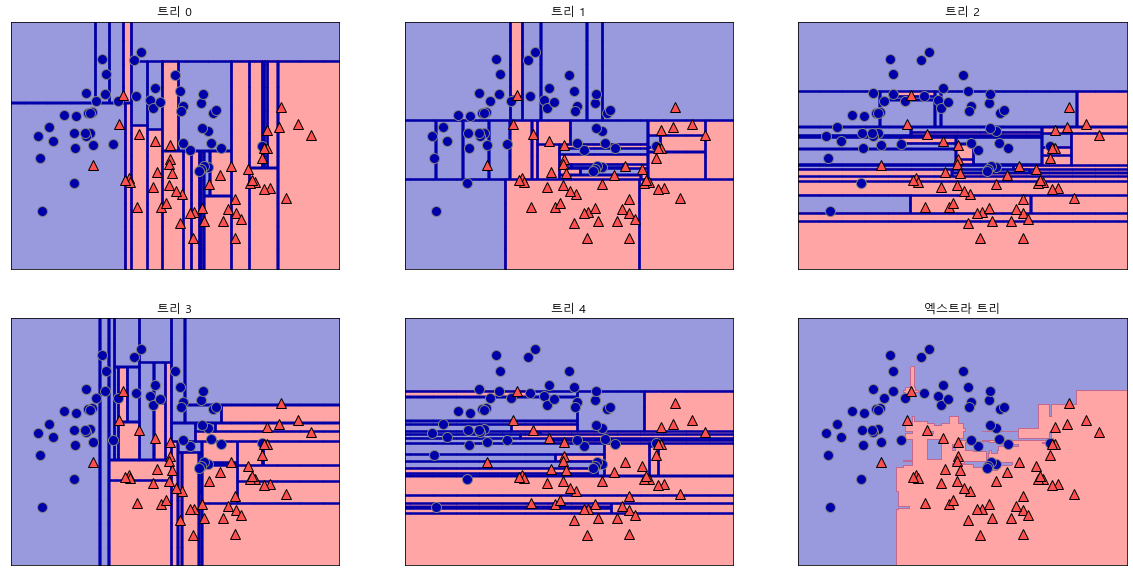

In [96]:
fig, axes = plt.subplots(2, 3, figsize = (20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax = ax)

mglearn.plots.plot_2d_separator(xtree, Xm, fill = True, ax = axes[-1, -1], alpha = .4)
axes[-1, -1].set_title("엑스트라 트리")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [97]:
xtree = ExtraTreesClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
xtree.fit(Xc_train, yc_train)

ExtraTreesClassifier(n_jobs=-1, random_state=0)

In [98]:
print("훈련 세트 정확도 : {:.3f}" .format(xtree.score(Xc_train, yc_train)))
print("테스트 세트 정확도 : {:.3f}" .format(xtree.score(Xc_test, yc_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


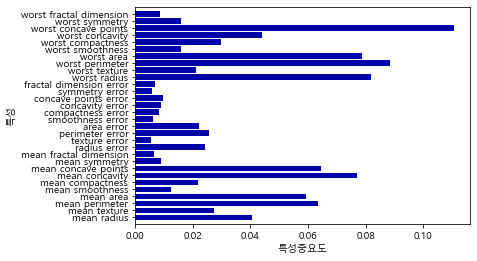

In [99]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

---
##### 에이다 부스트

In [100]:
'''
에이다부스트는 Adaptive Boosting의 줄임말로 그래디언트 부스팅처럼 약한 학습기를 사용한다.
그래디언트 부스팅과 달리 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킨다.
훈련된 각 모델은 성능에 따라 가중치가 부여된다.
예측을 만들 때는 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택한다.
'''

'\n에이다부스트는 Adaptive Boosting의 줄임말로 그래디언트 부스팅처럼 약한 학습기를 사용한다.\n'

In [101]:
# twoo_moons 데이터셋에 적용
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(Xm_train,ym_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

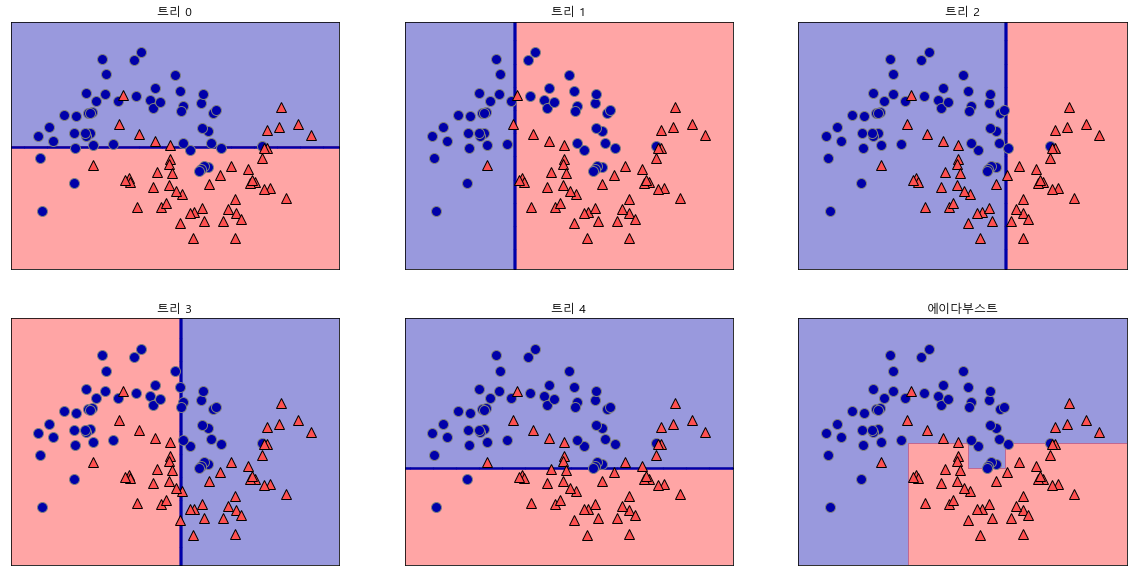

In [105]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("트리 {}" .format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)

mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title("에이다부스트")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

# AdaboostClassifier는 깊이가 1인 결정 트리를 사용하기 때문에 각 트리의 결정 경계가 직선 하나이다.
# 앙상블된 결정 경계도 다른 앙상블 모델에 비해 좀 더 단순하다.

In [106]:
# cancer 데이터셋에 적용
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [107]:
print("훈련 세트 정확도: {:.3f}" .format(ada.score(Xc_train, yc_train)))
print("테스트 세트 정확도: {:.3f}" .format(ada.score(Xc_test, yc_test)))

# 아주 얕은 트리를 앙상블했기 때문에 일반화 성능이 조금 더 향상되었다.

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


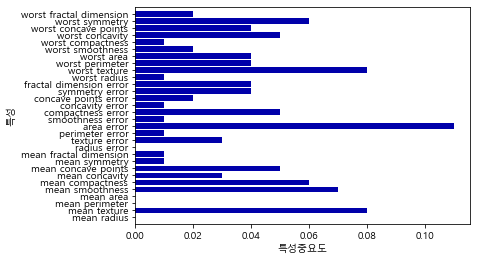

In [109]:
# 에이다부스트의 특성 중요도를 확인해보면 다른 모델에서 부각되지 않았던 area error 특성을 크게 강조하고 있다.
plt.barh(range(n_features), ada.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("특성중요도")
plt.ylabel("특성")
plt.ylim(-1, n_features)
plt.show()

---

<br>
<br>
<br>

---

### 2.3.8 커널 서포트 벡터 머신

In [ ]:
'''
입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것이다.
서포트 벡터 머신은 분류와 회귀 모두 사용할 수 있다.
'''

---

##### 선형 모델과 비선형 모델

Text(0, 0.5, '특성 1')

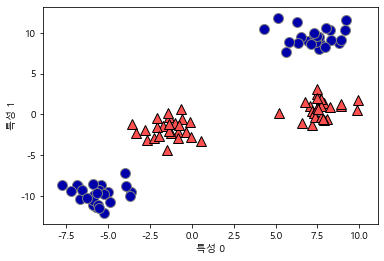

In [112]:
# 직선과 초평면은 유연하지 못하여 저차원 데이터셋에서는 선형 모델에 매우 제한적이다.
# 선형 모델을 유연하게 만드는 한 가지 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 새로운 특성을 추가하는 것이다.

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 선형적으로 분류되지 않는 클래스를 가진 이진 불류 데이터셋

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

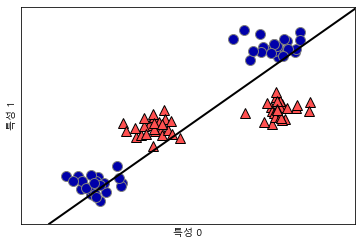

In [113]:
# 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어 맞지 않는다.
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y )
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 선형 svm으로 만들어진 결정 경계

C:\Users\USER\AppData\Local\Temp/ipykernel_22748/1992280528.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, '특성 1 ** 2')

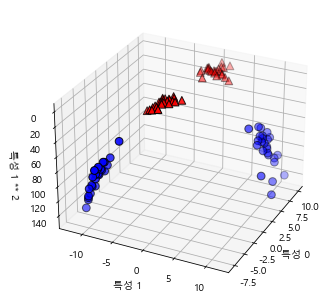

In [119]:
# 두 번째 특성을 제곱한 특성1**2 를 새로운 특성으로 추가해 입력 특성을 확장해서 3차원 데이터 포인트로 표현
X_new = np.hstack([X, X[:,1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

ax = Axes3D(figure, elev=-152, azim=-26)
mask = y ==0
ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2], c='b', cmap=mglearn.cm2, s=60, edgecolors='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolors='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1 ** 2")
